In [2]:
import json
import random

# Path to the full JSON file containing all frame data
input_file = "transforms.json"

# Output file names for the subsets
output_files = {
    16: "transforms_16.json",
    24: "transforms_24.json",
    32: "transforms_32.json"
}

# Load the full JSON file
with open(input_file, "r") as f:
    data = json.load(f)

frames = data.get("frames", [])
total_frames = len(frames)
print(f"Total frames in the input file: {total_frames}")

# Define the subset sizes
for size in [16, 24, 32]:
    if total_frames < size:
        print(f"Not enough frames to sample {size} images (total frames: {total_frames}).")
        continue

    # Randomly sample 'size' frames
    subset_frames = random.sample(frames, size)
    
    # Create a new JSON structure with the same keys (e.g. 'aabb_scale') but with the subset of frames
    subset_data = data.copy()
    subset_data["frames"] = subset_frames

    # Save the subset to a new file
    output_filename = output_files[size]
    with open(output_filename, "w") as out_f:
        json.dump(subset_data, out_f, indent=4)
    
    print(f"Created subset file with {size} frames: {output_filename}")


Total frames in the input file: 32
Created subset file with 16 frames: transforms_16.json
Created subset file with 24 frames: transforms_24.json
Created subset file with 32 frames: transforms_32.json


Processing file: transforms_32.json
Saved plot as transforms_32_cam_centers.png


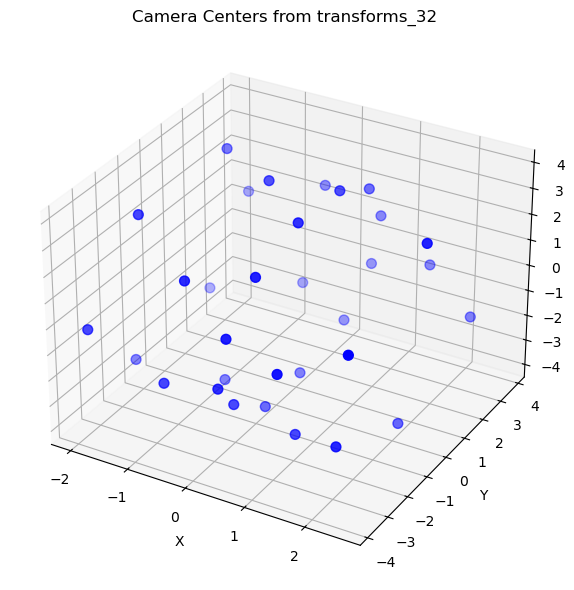

Processing file: transforms.json
Saved plot as transforms_cam_centers.png


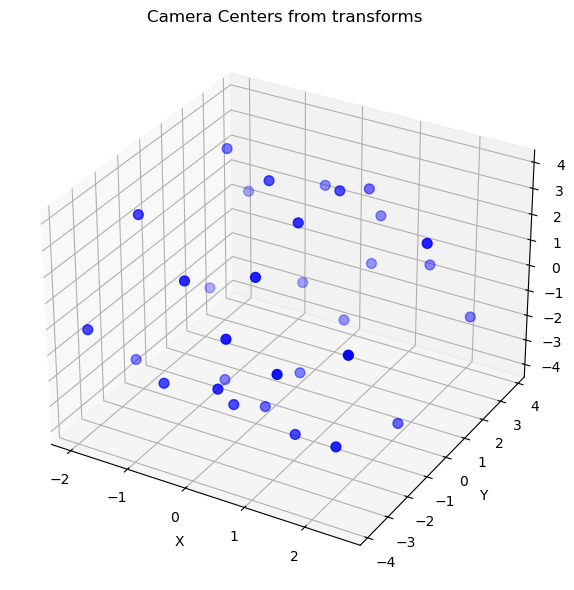

Processing file: transforms_16.json
Saved plot as transforms_16_cam_centers.png


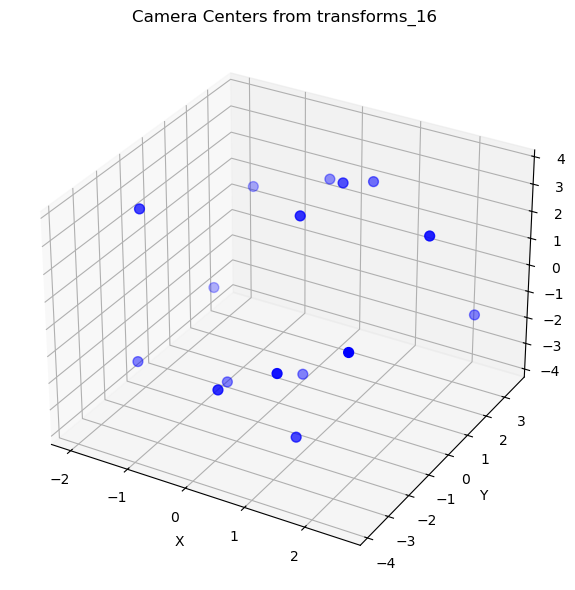

Processing file: transforms_24.json
Saved plot as transforms_24_cam_centers.png


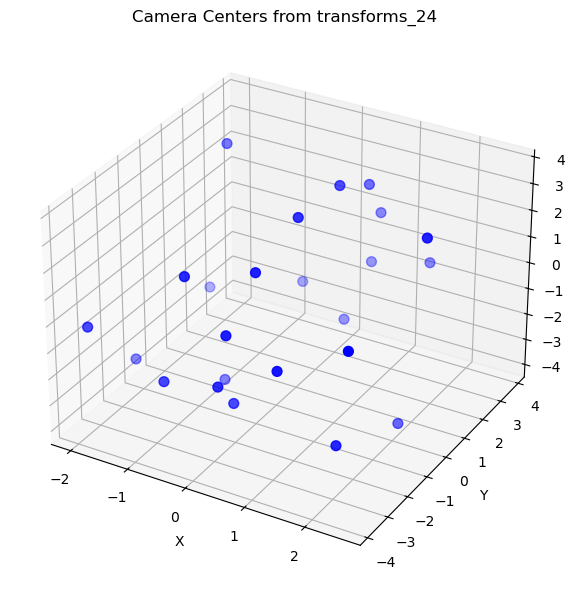

In [11]:
#!/usr/bin/env python3
import glob
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def load_transforms(filename):
    """Load the JSON file containing transform information."""
    with open(filename, "r") as f:
        data = json.load(f)
    return data

def extract_camera_centers(data):
    """
    Extract the camera centers from the transform data.
    
    Assumes that each frame has a 4x4 'transform_matrix' where the camera-to-world
    translation is in the first three entries of the last column.
    """
    centers = []
    frames = data.get("frames", [])
    for frame in frames:
        matrix = np.array(frame["transform_matrix"])
        center = matrix[:3, 3]  # Extract the translation part
        centers.append(center)
    return np.array(centers)

def plot_camera_centers(centers, title, output_filename):
    """Plot the camera centers in a 3D scatter plot and save the plot as a PNG file."""
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c="blue", marker="o", s=50)
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.tight_layout()
    plt.savefig(output_filename, dpi=300)
    print(f"Saved plot as {output_filename}")
    plt.show()

def main():
    # Look for all JSON files matching 'transforms*.json' in the current directory.
    transform_files = glob.glob("transforms*.json")
    if not transform_files:
        print("No transform files found in the current directory.")
        return

    # Process each transform file.
    for tf in transform_files:
        print(f"Processing file: {tf}")
        data = load_transforms(tf)
        centers = extract_camera_centers(data)
        base_name = os.path.splitext(os.path.basename(tf))[0]
        title = f"Camera Centers from {base_name}"
        output_filename = f"{base_name}_cam_centers.png"
        plot_camera_centers(centers, title, output_filename)

if __name__ == "__main__":
    main()
